In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_correlation_gone_norm.csv',index_col = 0)

In [3]:
df = df.loc[df['sqft_lot']<45000.00]

In [4]:
df['price'].mean()+3.5*df['price'].std()

1523475.4301070138

In [5]:
df = df.loc[df['price']<1350000.00]

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.405586,0.209677,0.609637,-0.190633,2.0,0.0,0.0,3,7,98125,0.684384,-0.625763,True,-0.287954,0.958060
1,2015-02-25,180000.0,-1.543479,-1.487493,-1.495270,-0.122346,1.0,0.0,0.0,3,6,98028,1.298721,1.381172,False,-0.109465,1.191764
2,2014-12-09,604000.0,0.732307,1.227979,-0.103693,-0.246143,1.0,0.0,0.0,5,7,98136,0.206566,0.273898,True,-0.490187,-1.103219
3,2015-02-18,510000.0,-0.405586,-0.129757,-0.431123,-0.169884,1.0,0.0,0.0,3,8,98074,-0.544290,-0.487353,False,-0.382161,0.581657
4,2014-05-12,1230000.0,0.732307,3.264583,3.942407,2.153792,1.0,0.0,0.0,3,11,98053,-1.022108,-0.971786,True,0.005322,1.123035


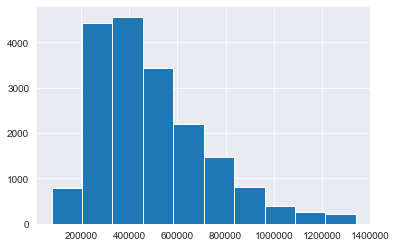

In [8]:
df['price'].hist()

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.405586,0.209677,0.609637,-0.190633,2.0,0.0,0.0,3,7,98125,0.684384,-0.625763,True,-0.287954,0.958060
1,2015-02-25,180000.0,-1.543479,-1.487493,-1.495270,-0.122346,1.0,0.0,0.0,3,6,98028,1.298721,1.381172,False,-0.109465,1.191764
2,2014-12-09,604000.0,0.732307,1.227979,-0.103693,-0.246143,1.0,0.0,0.0,5,7,98136,0.206566,0.273898,True,-0.490187,-1.103219
3,2015-02-18,510000.0,-0.405586,-0.129757,-0.431123,-0.169884,1.0,0.0,0.0,3,8,98074,-0.544290,-0.487353,False,-0.382161,0.581657
4,2014-05-12,1230000.0,0.732307,3.264583,3.942407,2.153792,1.0,0.0,0.0,3,11,98053,-1.022108,-0.971786,True,0.005322,1.123035


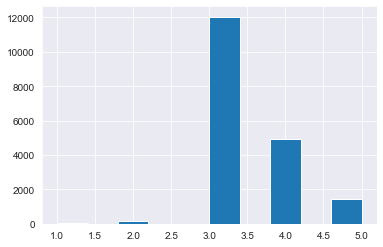

In [10]:
df['condition'].hist()

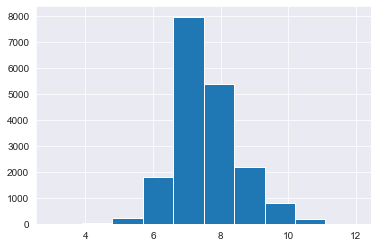

In [11]:
df['grade'].hist()

In [12]:
df['grade'].value_counts()

7     7954
8     5363
9     2181
6     1810
10     797
5      212
11     193
4       25
12       8
3        1
Name: grade, dtype: int64

In [13]:
df['waterfront'].value_counts()

0.0    18478
1.0       66
Name: waterfront, dtype: int64

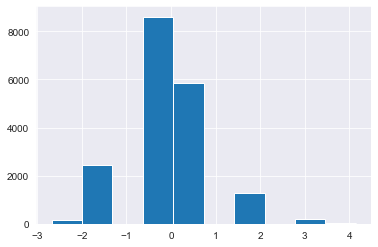

In [14]:
df['bedrooms'].hist()

In [15]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [16]:
# tomodel = ['grade','distance_from_a_city','basement','biggerliving','biggerlot','Years_last_renovation','view']

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.405586,0.209677,0.609637,-0.190633,2.0,0.0,0.0,3,7,98125,0.684384,-0.625763,True,-0.287954,0.958060
1,2015-02-25,180000.0,-1.543479,-1.487493,-1.495270,-0.122346,1.0,0.0,0.0,3,6,98028,1.298721,1.381172,False,-0.109465,1.191764
2,2014-12-09,604000.0,0.732307,1.227979,-0.103693,-0.246143,1.0,0.0,0.0,5,7,98136,0.206566,0.273898,True,-0.490187,-1.103219
3,2015-02-18,510000.0,-0.405586,-0.129757,-0.431123,-0.169884,1.0,0.0,0.0,3,8,98074,-0.544290,-0.487353,False,-0.382161,0.581657
4,2014-05-12,1230000.0,0.732307,3.264583,3.942407,2.153792,1.0,0.0,0.0,3,11,98053,-1.022108,-0.971786,True,0.005322,1.123035


In [18]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.405586,0.209677,0.609637,-0.190633,2.0,0.0,0.0,3,7,98125,0.684384,-0.625763,True,-0.287954,0.958060
1,2015-02-25,180000.0,-1.543479,-1.487493,-1.495270,-0.122346,1.0,0.0,0.0,3,6,98028,1.298721,1.381172,False,-0.109465,1.191764
2,2014-12-09,604000.0,0.732307,1.227979,-0.103693,-0.246143,1.0,0.0,0.0,5,7,98136,0.206566,0.273898,True,-0.490187,-1.103219
3,2015-02-18,510000.0,-0.405586,-0.129757,-0.431123,-0.169884,1.0,0.0,0.0,3,8,98074,-0.544290,-0.487353,False,-0.382161,0.581657
4,2014-05-12,1230000.0,0.732307,3.264583,3.942407,2.153792,1.0,0.0,0.0,3,11,98053,-1.022108,-0.971786,True,0.005322,1.123035


In [19]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [20]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [21]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Age_of_House','basement','grade']
outcome = ['price']

In [22]:
train, test = train_test_split(df)


In [23]:
print(len(train), len(test))
train.head()

13908 4636


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,distance_from_a_city,distance_from_airport,bedbath
2818,2014-10-10,965000.0,0.732307,1.567413,3.462956,0.848770,2.0,0.0,0.0,5,9,98027,-0.237122,-0.175932,True,-0.488726,-0.208113,1.147826
10952,2015-04-02,305000.0,-1.543479,-1.487493,-1.331555,0.192718,1.0,0.0,0.0,1,6,98155,1.537630,1.623388,False,0.291592,1.533961,2.295914
3981,2014-09-25,477000.0,-0.405586,-0.129757,-0.349265,-0.246391,1.0,0.0,0.0,3,7,98107,1.878928,1.969411,True,-0.876659,0.370368,0.052628
110,2014-11-19,391500.0,-0.405586,-0.129757,-0.700083,-0.143837,1.0,0.0,0.0,3,7,98034,-0.544290,-0.487353,False,-0.218912,1.097338,0.052628
7678,2014-09-05,659000.0,-0.405586,-0.808625,-0.594838,-0.245153,2.0,0.0,0.0,3,8,98122,2.186096,2.280832,False,-1.283651,-0.280429,0.327967


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18544 entries, 0 to 19001
Data columns (total 18 columns):
date                     18544 non-null object
price                    18544 non-null float64
bedrooms                 18544 non-null float64
bathrooms                18544 non-null float64
sqft_living              18544 non-null float64
sqft_lot                 18544 non-null float64
floors                   18544 non-null float64
waterfront               18544 non-null float64
view                     18544 non-null float64
condition                18544 non-null int64
grade                    18544 non-null int64
zipcode                  18544 non-null int64
Age_of_House             18544 non-null float64
Years_last_renovation    18544 non-null float64
basement                 18544 non-null bool
distance_from_a_city     18544 non-null float64
distance_from_airport    18544 non-null float64
bedbath                  18544 non-null float64
dtypes: bool(1), float64(13), int64(3

In [30]:
X = train[x_cols]
y = train['price']

KeyError: "['const'] not in index"

In [26]:
np.asarray(X)

array([[0.7323065330344629, 1.5674125941098591, 3.462956276650006, ...,
        -0.2371216907984981, True, 9],
       [-1.5434786890966783, -1.4874932365773503, -1.3315553088335117,
        ..., 1.5376296038239359, False, 6],
       [-0.4055860780311077, -0.1297573118274795, -0.34926513034420537,
        ..., 1.8789279297128656, True, 7],
       ...,
       [0.7323065330344629, -0.8086252742024149, 0.5043918104857867, ...,
        0.5478644587460402, True, 8],
       [-1.5434786890966783, -0.1297573118274795, -0.8754920116777621,
        ..., -1.1586271706986082, False, 8],
       [3.008091755165605, 0.8885446317349237, 1.3931305434046826, ...,
        0.718513621690505, True, 6]], dtype=object)

In [27]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

9 9
['const', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,-1.297e+05,1.26e+04,-10.336,0.0,-1.54e+05,-1.05e+05
bedrooms,-1.496e+04,1395.419,-10.720,0.0,-1.77e+04,-1.22e+04
bathrooms,2.184e+04,1847.496,11.823,0.0,1.82e+04,2.55e+04
sqft_living,1.029e+05,2187.443,47.037,0.0,9.86e+04,1.07e+05
sqft_lot,1.711e+04,1086.619,15.746,0.0,1.5e+04,1.92e+04


In [29]:
X = train[x_cols]
y= train['price']

KeyError: "['const'] not in index"

In [ ]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor((X.astype(float)).values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

In [ ]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

In [ ]:
X = train[x_cols]
y= train['price']

X_int = sm.add_constant(X)

model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


In [ ]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
df.price.hist()

In [ ]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

In [ ]:
orig_tot = len(df)
df = df[df.price < 1100000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
train, test = train_test_split(df)

In [ ]:
X = train[x_cols]
y = train['price']


X_int = sm.add_constant(X)

model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

In [ ]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

In [ ]:
X = train[x_cols]
y= train['price']

X_int = sm.add_constant(X)

model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

In [ ]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.astype(float).values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


In [ ]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [ ]:
df = df[df.price <= 9250000]
train, test = train_test_split(df)

In [ ]:

X = train[x_cols]
y= train['price']

X_int = sm.add_constant(X)

model = sm.OLS(y,X_int.astype(float)).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


In [ ]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [ ]:
residuals = model.resid

In [ ]:
plot_residuals(residuals)

In [ ]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [ ]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [ ]:
X_train = train[x_cols]
X_test = test[x_cols]

In [ ]:
y_train = train['price']
y_test = test['price']

In [ ]:
ols.fit(train[x_cols], train['price'])

In [ ]:
ols.coef_

In [ ]:
ols.intercept_

In [ ]:
y_train_preds = ols.predict(train[x_cols])
y_train_preds

In [ ]:
r2_score(train['price'], y_train_preds)

In [ ]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

In [ ]:
testing_score = ols.score(X_test, y_test)
testing_score

In [ ]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv10_scores

In [ ]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv10_scores